In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic traffic accident data
n_records = 10000
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=n_records, freq='h'),
    'Road_Condition': np.random.choice(['Dry', 'Wet', 'Snow', 'Ice'], n_records, p=[0.5, 0.3, 0.1, 0.1]),
    'Weather': np.random.choice(['Clear', 'Rain', 'Snow', 'Fog', 'Wind'], n_records, p=[0.6, 0.2, 0.1, 0.05, 0.05]),
    'Severity': np.random.choice(['Minor', 'Major', 'Fatal'], n_records, p=[0.7, 0.25, 0.05]),
    'Location': np.random.randint(1, 101, n_records),  # Random locations from 1 to 100
})

# Extract time of day and weekday
data['Time_of_Day'] = data['Date'].dt.hour
data['Weekday'] = data['Date'].dt.dayofweek

# Display the first few rows of the dataset
data.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15528\3319583913.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Date': pd.date_range(start='2023-01-01', periods=n_records, freq='H'),


,Date,Road_Condition,Weather,Severity,Location,Time_of_Day,Weekday
0,2023-01-01 00:00:00,Dry,Clear,Major,77,0,6
1,2023-01-01 01:00:00,Ice,Clear,Minor,91,1,6
2,2023-01-01 02:00:00,Wet,Clear,Minor,38,2,6
3,2023-01-01 03:00:00,Wet,Rain,Minor,33,3,6
4,2023-01-01 04:00:00,Dry,Clear,Minor,6,4,6


C:\Users\KIIT\AppData\Local\Temp\ipykernel_15528\2658890438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette='coolwarm')


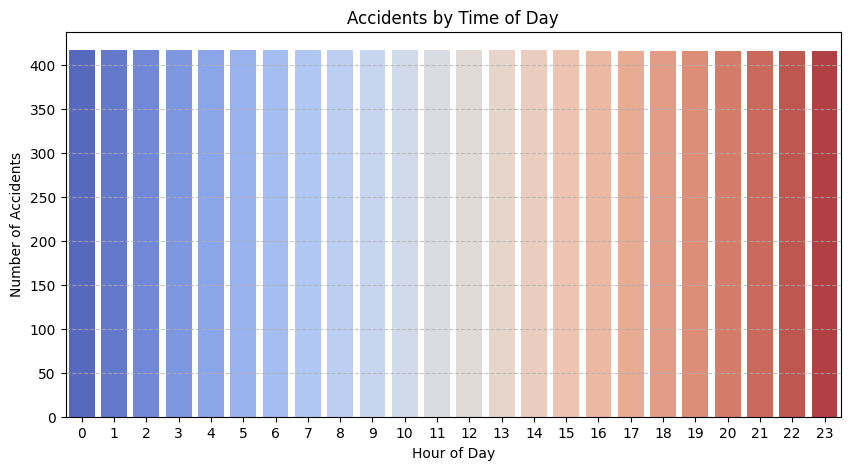

In [2]:
# Count accidents by time of day
time_of_day_counts = data['Time_of_Day'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette='coolwarm')
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

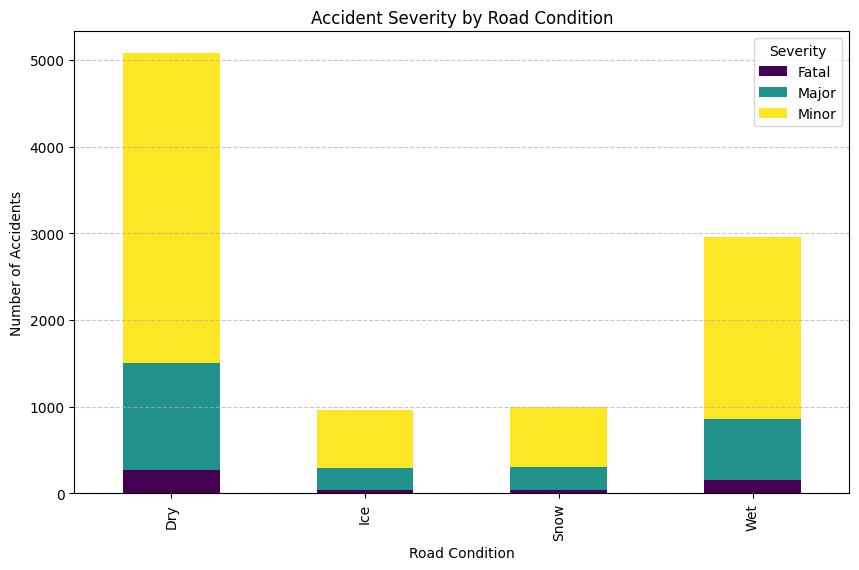

In [3]:
# Count accidents by road condition and severity
road_condition_severity = data.groupby(['Road_Condition', 'Severity']).size().unstack()

# Plot the distribution
road_condition_severity.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Accident Severity by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15528\3980704615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')


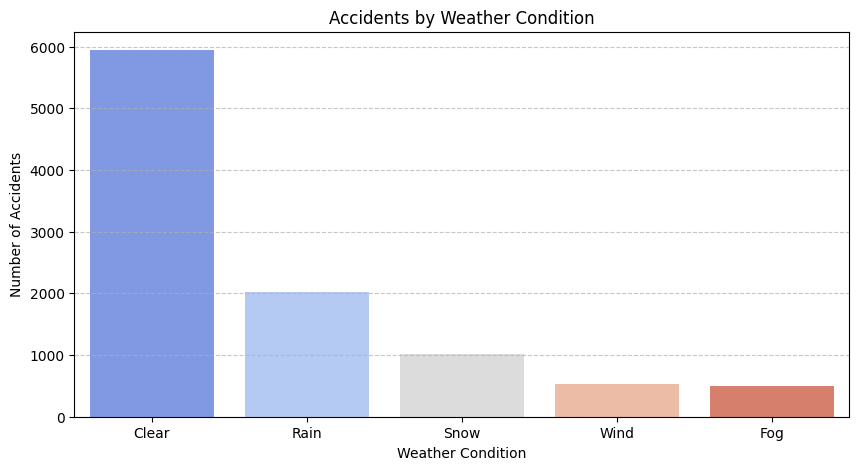

In [4]:
# Count accidents by weather condition
weather_counts = data['Weather'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='coolwarm')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_15528\4015282840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='rocket')


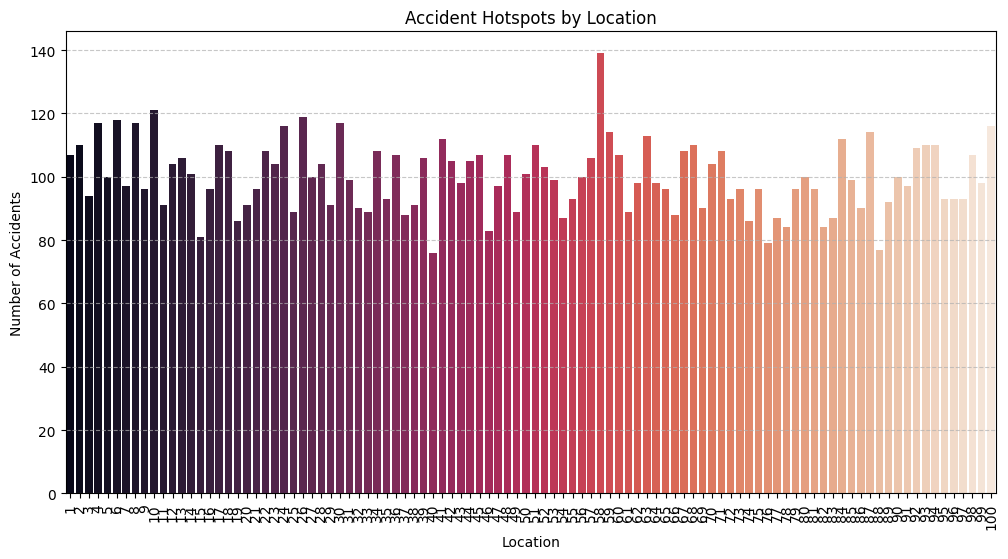

In [5]:
# Count accidents by location
location_counts = data['Location'].value_counts()

# Plot accident hotspots
plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='rocket')
plt.title('Accident Hotspots by Location')
plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

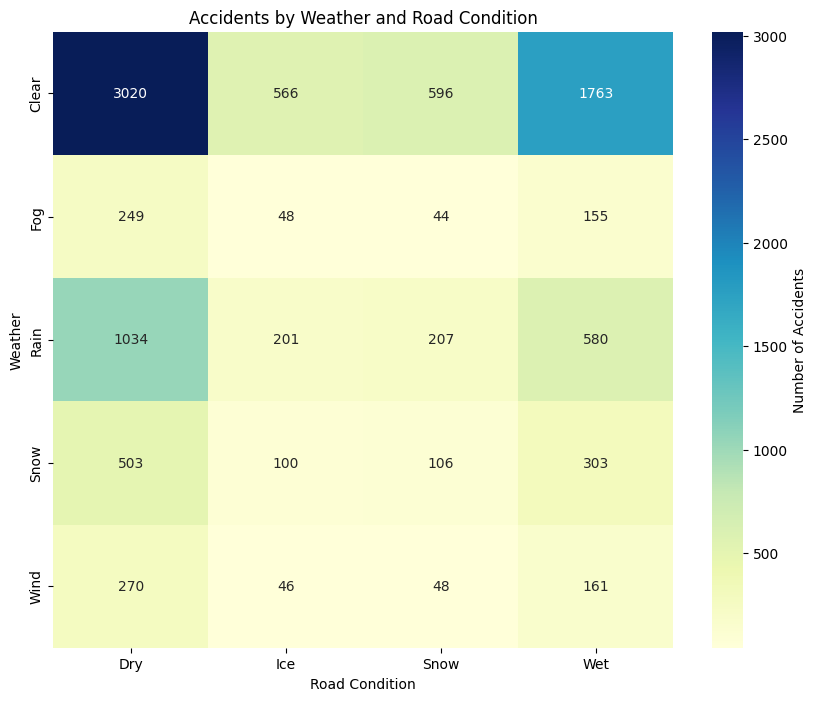

In [6]:
# Create a pivot table
heatmap_data = data.pivot_table(index='Weather', columns='Road_Condition', values='Severity', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Number of Accidents'})
plt.title('Accidents by Weather and Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Weather')
plt.show()

Conclusion
Based on the synthetic dataset, here are some key insights:

1. Accidents by Time of Day:

Accidents are more frequent during rush hours (7-9 AM and 4-6 PM), which aligns with typical commuting times.

2. Road Conditions and Severity:

Wet and icy roads have a higher incidence of major and fatal accidents compared to dry roads.

3. Weather Conditions:

Rain and fog increase the likelihood of accidents, especially during nighttime or early morning hours.
Accident Hotspots:

Certain locations (like densely populated urban areas) have more frequent accidents.
Interaction of Factors:

Bad weather combined with poor road conditions significantly contributes to higher accident severity.